<a href="https://colab.research.google.com/github/Davy1nbg/Aktien-Korrelation_Heatmap/blob/main/aktien_Corr_Risikosympathie_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  17 of 17 completed


<Axes: xlabel='None-None', ylabel='None-None'>

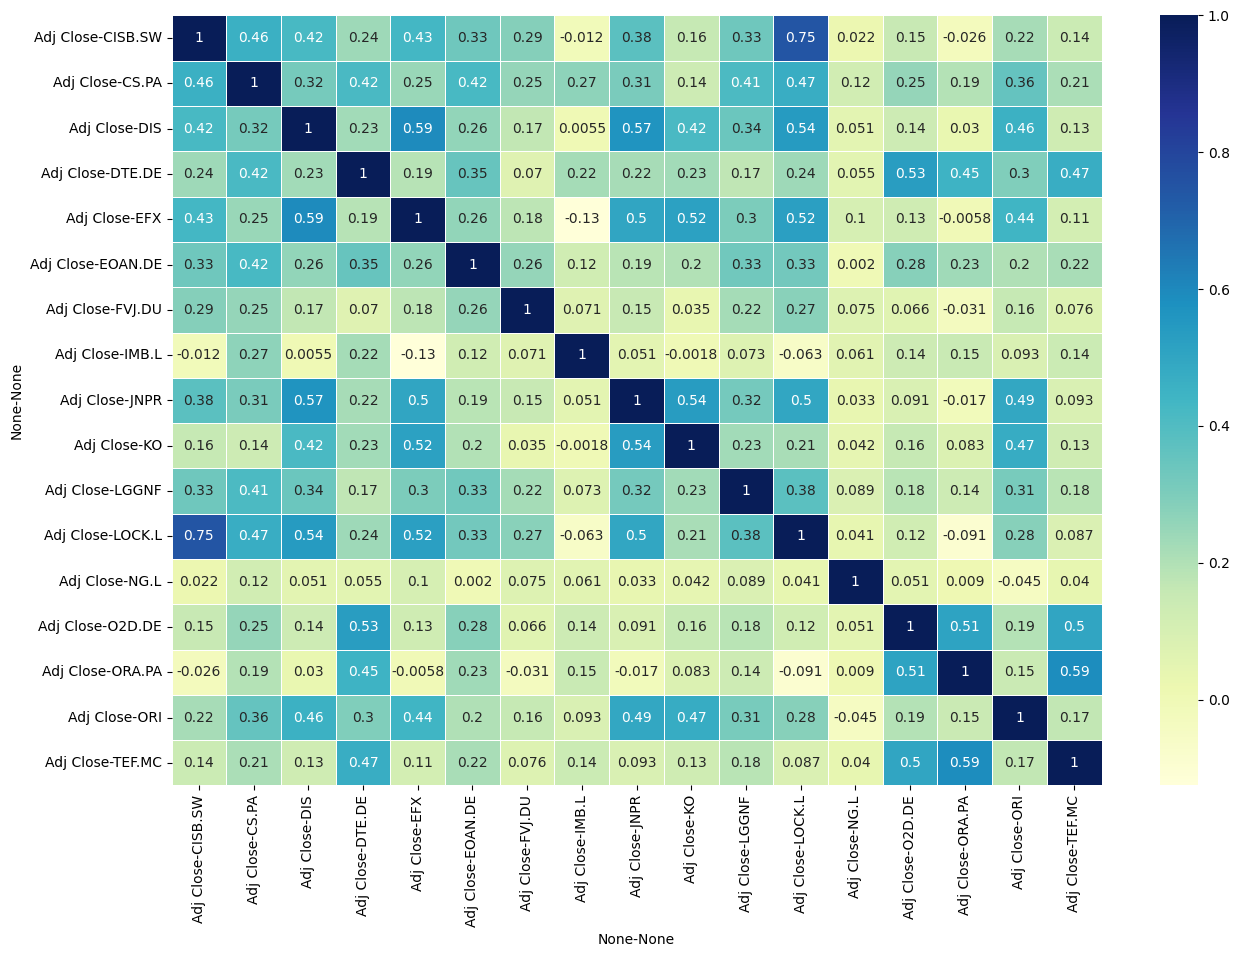

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

# tragt in diesem Array die Kürzel eurer Aktien von Yahoo!Finance ein. Bsp.: 22UA.F für Biontech || https://de.finance.yahoo.com
aktienliste = ['EFX', 'KO', 'EOAN.DE', 'CS.PA', 'DIS', 'DTE.DE', 'FVJ.DU', 'LGGNF', 'ORI', 'IMB.L', 'LOCK.L', 'JNPR', 'NG.L', 'ORA.PA', 'CISB.SW', 'O2D.DE', 'TEF.MC']

# hiermit greifen wir auf die yfinance Bibliothek zu. Ein Open-Source Projekt zur Nutzung der Yahoo!Finance-API || https://pypi.org/project/yfinance/
# hier gibt es auch viele andere Möglichkeiten auf die YF-API zugreifen können und es gibt natürlich auch Alternativen zu YF-Finance selbst || https://rapidapi.com/collection/yahoo-finance-alternatives
aktien = yf.download(aktienliste, period="1y")

# damit greife ich nur auf den "Adjusted Close" Wert zu. Diese stellt die Schlußkurse unter berücksichtigungen von Aktien-Splits und Dividenden dar.
# https://eodhistoricaldata.com/financial-apis/adjusted-close-and-close-whats-the-difference/
adj_close = aktien[['Adj Close']]

# hier erzeuge ich mittels eine Funktion aus der pandas-Bibliothek die prozentuale Veränderung der adjusted close Werte... 
aktien_ret = adj_close.pct_change()
# und nutze sie mit .corr (ebenfalls aus der pandas-Bibliothek) um die Korrelation zu errechnen. || https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html?highlight=corr#pandas.DataFrame.corr
aktien_corr = aktien_ret.corr()

# mittels der Bibliothek Seaborn erzeuge ich schließlich eine Heatmap für eine optimale Visualisierung. || https://seaborn.pydata.org/
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(aktien_corr, annot=True, cmap="YlGnBu", linewidths=.5, ax=ax)

In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
